In [1]:
import sys
import os
# Add the 'project' directory to the path
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [3]:
pars_to_compare = ['z', '1-kap', 'v', 'p_M', 'E_Hb', 'E_Hp']

# Load results

In [4]:
#df = pd.read_csv('../data/raw/estimation_from_AmP_pars.csv', index_col=0)
#df = pd.read_csv('../data/estimation_runs/full_estimation_from_AmP_pars_subset_test_set.csv', index_col=0)
df = pd.read_csv('../data/estimation_runs/run_train_val_sets_until_minimum.csv', index_col=0)


df.index.name = 'species'
#df.drop(columns=['data_split'])
# Drop species that were not run yet -> execution_time == 0
df = df[df.execution_time > 0]
# Create columns for '1-kap'
df['1-kap_i'] = 1 - df['kap_i']
df['1-kap_f'] = 1 - df['kap_f']
# Convert boolean variables
df['convergence'] = df['convergence'].astype(bool)
df['error'] = df['error'].astype(bool)
# Fix error being false when an error message is logged
max_execution_time_error_message = "Maximum execution time exceeded"
df.loc[(~df['error_message'].isna()) & (df['error_message'] != max_execution_time_error_message), 'error'] = True
df


,init_loss,z_i,kap_i,v_i,p_M_i,E_Hb_i,E_Hp_i,final_loss,z_f,kap_f,...,E_Hb_f,E_Hp_f,convergence,n_runs,n_iter,execution_time,error,error_message,1-kap_i,1-kap_f
species,,,,,,,,,,,,,,,,,,,,,
Sepiella_inermis,0.466196,0.444090,0.73830,0.025902,882.4408,56.74000,16330.0000,0.422621,0.459775,0.746540,...,51.553179,17601.332536,True,7,3488,312.367851,False,NaN,0.26170,0.253460
Peucaea_botterii,0.131787,1.701900,0.97544,0.048308,584.5174,177.20000,1937.0000,0.109257,0.909771,0.965543,...,63.534347,511.215271,False,39,19500,1006.346506,False,NaN,0.02456,0.034457
Molothrus_bonariensis,0.142471,1.986500,0.82804,0.053568,687.9868,2176.00000,30820.0000,0.142409,1.982540,0.828091,...,2179.890185,30682.237689,False,1,500,54.134099,False,NaN,0.17196,0.171909
Xiphophorus_maculatus,0.348674,0.964880,0.57892,0.022653,287.8024,12.04000,1646.0000,0.348674,0.964848,0.578890,...,12.040168,1646.300480,False,1,500,23.895588,False,NaN,0.42108,0.421110
Cnidoglanis_macrocephalus,0.031688,9.231700,0.53392,0.025475,30.9836,148.30000,579500.0000,0.028419,8.944826,0.500467,...,162.263736,599751.616484,True,7,3472,175.172382,False,NaN,0.46608,0.499533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Moina_weismanni,0.129960,0.036359,0.46386,0.025982,2795.7862,0.01609,0.1052,0.129959,0.036362,0.463765,...,0.016111,0.105354,False,1,500,29.738363,False,NaN,0.53614,0.536235
Nipponia_nippon,0.107336,3.848800,0.92208,0.026915,1337.3902,2755.00000,94010.0000,0.107239,3.837297,0.924466,...,2630.105986,89634.062162,False,1,500,40.660928,False,NaN,0.07792,0.075534
Lutjanus_kasmira,0.000000,0.000000,0.00000,0.000000,0.0000,0.00000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,False,0,0,0.334265,True,The logical indices contain a true value outsi...,1.00000,1.000000


In [5]:
# Convert final_loss column to complex type if it is of type object
if df['final_loss'].dtype == np.dtype('O'):
    df['final_loss'] = df['final_loss'].apply(lambda x: complex(x.replace('i', 'j')) if isinstance(x, str) else x)

# Set error if loss is imaginary
imaginary_loss_mask = df['final_loss'].apply(lambda x: x.imag != 0 if isinstance(x, complex) else False)
df.loc[imaginary_loss_mask, 'error'] = True
df.loc[imaginary_loss_mask, 'error_message'] = 'Final loss has imaginary part'

# Convert final_loss column to complex type if it is of type object
if df['init_loss'].dtype == np.dtype('O'):
    df['init_loss'] = df['init_loss'].apply(lambda x: complex(x.replace('i', 'j')) if isinstance(x, str) else x)

# Set error if loss is imaginary
imaginary_loss_mask = df['init_loss'].apply(lambda x: x.imag != 0 if isinstance(x, complex) else False)
df.loc[imaginary_loss_mask, 'error'] = True
df.loc[imaginary_loss_mask, 'error_message'] = 'Initial loss has imaginary part'

In [6]:
print(f"{df['convergence'].sum()} out of {len(df)} species converged ({df['convergence'].sum()/len(df)*100:.2f}%)")
print(f"{df['error'].sum()} out of {len(df)} species threw an error ({df['error'].sum()/len(df)*100:.2f}%)")

126 out of 1926 species converged (6.54%)
15 out of 1926 species threw an error (0.78%)


In [7]:
df['error_message'].value_counts()

error_message
Maximum execution time exceeded                                                                       44
The logical indices contain a true value outside of the array bounds.                                  7
Folder for species "Deania_calcea" does not exist.                                                     1
Unable to perform assignment because the left and right sides have a different number of elements.     1
Out of memory.                                                                                         1
Arrays have incompatible sizes for this operation.                                                     1
Folder for species "Anadontostoma_chacunda" does not exist.                                            1
Dimensions of arrays being concatenated are not consistent.                                            1
Index in position 2 exceeds array bounds.                                                              1
predict_filter                           

In [22]:
df[~df['error_message'].isna()][['error_message','n_iter', 'execution_time']].sort_values(by='error_message')

,error_message,n_iter,execution_time
species,,,
Macropus_rufus,Arrays have incompatible sizes for this operat...,0,1.327052
Saxicola_rubicola,Dimensions of arrays being concatenated are no...,0,315.972959
Anadontostoma_chacunda,"Folder for species ""Anadontostoma_chacunda"" do...",0,0.112043
Deania_calcea,"Folder for species ""Deania_calcea"" does not ex...",0,0.111158
Lepisma_saccharina,Index in position 2 exceeds array bounds.,0,0.772026
Ameiurus_nebulosus,Maximum execution time exceeded,0,54000.000000
Thryssa_aestuaria,Maximum execution time exceeded,0,54000.000000
Brevoortia_patronus,Maximum execution time exceeded,0,54000.000000
Cynoglossus_canariensis,Maximum execution time exceeded,0,54000.000000


# Analysis 

In [8]:
# Remove species with errors
par_gap_cols = [p+'_gap' for p in pars_to_compare]
gap_df = pd.DataFrame(index=df[df['error_message'].isna()].index, columns=['loss_diff', 'loss_gap'] + par_gap_cols)
gap_df['loss_diff'] = df['init_loss'] - df['final_loss']
gap_df['loss_gap'] = (df['init_loss'] - df['final_loss']) / df['init_loss'] * 100
for p in pars_to_compare:
    gap_df[p+'_gap'] = (df[f"{p}_i"] - df[f"{p}_f"]).abs() / df[f"{p}_i"]
gap_df['par_dist_metric'] = gap_df[par_gap_cols].sum(axis=1)
gap_df.sort_index()

,loss_diff,loss_gap,z_gap,1-kap_gap,v_gap,p_M_gap,E_Hb_gap,E_Hp_gap,par_dist_metric
species,,,,,,,,,
Abbottina_rivularis,0.000313,1.423102,0.012872,0.006783,0.002105,0.009806,0.004926,0.001657,0.038149
Ablennes_hians,0.000437,5.072411,0.000158,0.002655,0.000645,0.001306,0.000903,0.000928,0.006596
Abramis_brama,3.740820,85.395974,0.005377,0.013913,0.016134,0.016504,0.001874,0.029932,0.083734
Abroscopus_superciliaris,0.002004,1.192050,0.065921,0.235992,0.063955,0.272046,0.112636,0.069464,0.820014
Acanthis_hornemanni,0.017559,14.198116,0.348965,0.899679,0.390126,3.247896,0.149530,0.362899,5.399094
...,...,...,...,...,...,...,...,...,...
Zonotrichia_capensis,0.017059,14.202153,0.396994,0.250576,0.437387,4.383255,0.575271,0.664652,6.708135
Zonotrichia_leucophrys,0.016908,14.034582,0.373845,0.387792,0.403923,3.501339,0.476274,0.604621,5.747794
Zonotrichia_querula,0.015805,13.171207,0.355805,0.098313,0.385637,3.101497,0.599870,0.678415,5.219536


## Loss improvement

Text(0.5, 0, 'Relative improvement in loss (%)')

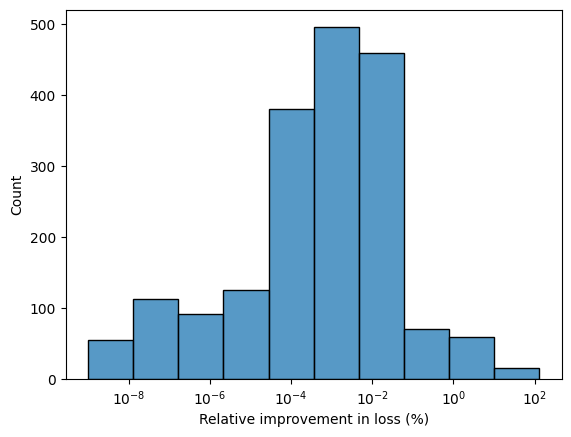

In [9]:
fig, ax = plt.subplots()
sns.histplot(gap_df['loss_diff'], bins=10, kde=False, ax=ax, log_scale=True)
ax.set_xlabel('Relative improvement in loss (%)')

In [10]:
loss_gap_cutoff = 10 # in percentage
n_species_below_cutoff = (gap_df['loss_gap'] < loss_gap_cutoff).sum()
print(f"There are {n_species_below_cutoff} ({n_species_below_cutoff/len(gap_df)*100:.2f} %) species with a loss improvement < {loss_gap_cutoff} %")

There are 1488 (79.70 %) species with a loss improvement < 10 %


In [11]:
(gap_df['loss_gap'] > 10).sum()

378

## Worst species

In [12]:
print("nm = { ...")
for s, lg in gap_df.loc[gap_df['loss_gap'] > 80, 'loss_gap'].items():
        print(f"'{s}'")
print("};")

nm = { ...
'Sardinella_fimbriata'
'Erilepis_zonifer'
'Alasmidonta_heterodon'
'Konosirus_punctatus'
'Gobionotothen_gibberifrons'
'Dascyllus_reticulatus'
'Zoarces_americanus'
'Tritogonia_verrucosa'
'Diplectrum_formosum'
'Labeo_calbasu'
'Ambiserrula_jugosa'
'Cynoglossus_semifasciatus'
'Amphiuma_means'
'Isopsetta_isolepis'
'Pseudopleuronectes_americanus'
'Lota_lota'
'Mytilaster_minimus'
'Liparis_inquilinus'
'Lutjanus_vitta'
'Pterodroma_pycrofti'
'Morone_chrysops'
'Pagothenia_borchgrevinki'
'Gymnarchus_niloticus'
'Labeo_coubie'
'Coregonus_kiyi'
'Lampsilis_teres'
'Trachurus_japonicus'
'Stegastes_nigricans'
'Photopectoralis_bindus'
'Encrasicholina_heteroloba'
'Lates_longispinis'
'Glyptocephalus_kitaharae'
'Oceanodroma_furcata'
'Arripis_georgianus'
'Eopsetta_jordani'
'Abramis_brama'
'Sardinella_maderensis'
'Chionomesa_fimbriata'
'Karalla_dussumieri'
'Trematomus_newnesi'
'Labeo_altivelis'
'Syngnathus_taenionotus'
'Centropyge_bicolor'
'Decapterus_maruadsi'
'Pelagodroma_marina'
'Euprymna_hylleber

In [13]:
for s, lg in gap_df['loss_gap'].sort_values(ascending=False).items():
    print(f"{s}: {lg:.2f}%")

Sardinella_maderensis: 99.95%
Trachurus_japonicus: 99.95%
Labeo_coubie: 99.94%
Maccullochella_peelii: 99.90%
Setipinna_taty: 99.90%
Pagellus_bellottii: 99.88%
Isopsetta_isolepis: 99.87%
Atheresthes_evermanni: 99.87%
Etropus_crossotus: 99.87%
Ambiserrula_jugosa: 99.86%
Pellonula_leonensis: 99.82%
Rogadius_asper: 99.79%
Stegastes_nigricans: 99.78%
Photopectoralis_bindus: 99.76%
Dascyllus_reticulatus: 99.75%
Karalla_dussumieri: 99.73%
Rhombosolea_leporina: 99.73%
Labeo_altivelis: 99.68%
Pomadasys_striatus: 99.55%
Cynoglossus_semifasciatus: 99.48%
Glyptocephalus_kitaharae: 99.47%
Alasmidonta_heterodon: 99.35%
Lepidorhombus_boscii: 99.21%
Sardinella_sindensis: 99.21%
Sardinella_fimbriata: 99.12%
Konosirus_punctatus: 98.83%
Cephalopholis_fulva: 98.74%
Neobola_stellae: 98.64%
Gobionotothen_gibberifrons: 98.57%
Scorpaena_notata: 98.56%
Encrasicholina_punctifer: 98.37%
Centropyge_bicolor: 98.30%
Gymnarchus_niloticus: 98.08%
Hyperoplus_lanceolatus: 98.05%
Amblygaster_sirm: 97.92%
Decapterus_maru

## Parameter differences

c:\Users\dmoliveira\AppData\Local\miniconda3\envs\deb_ml_init\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Text(0.5, 0, 'Parameter distance metric')

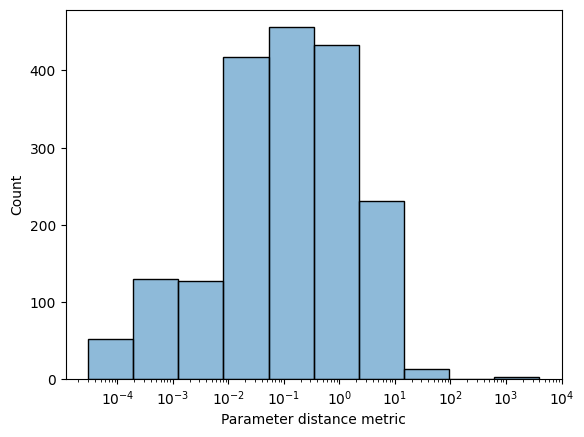

In [14]:
fig, ax = plt.subplots()
sns.histplot(gap_df['par_dist_metric'], bins=10, kde=True, ax=ax, log_scale=True)
ax.set_xlabel('Parameter distance metric')

c:\Users\dmoliveira\AppData\Local\miniconda3\envs\deb_ml_init\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dmoliveira\AppData\Local\miniconda3\envs\deb_ml_init\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dmoliveira\AppData\Local\miniconda3\envs\deb_ml_init\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dmoliveira\AppData\Local\miniconda3\envs\deb_ml_init\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\dmoliveira\AppData\Local\miniconda3\envs\deb_ml_init\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _e

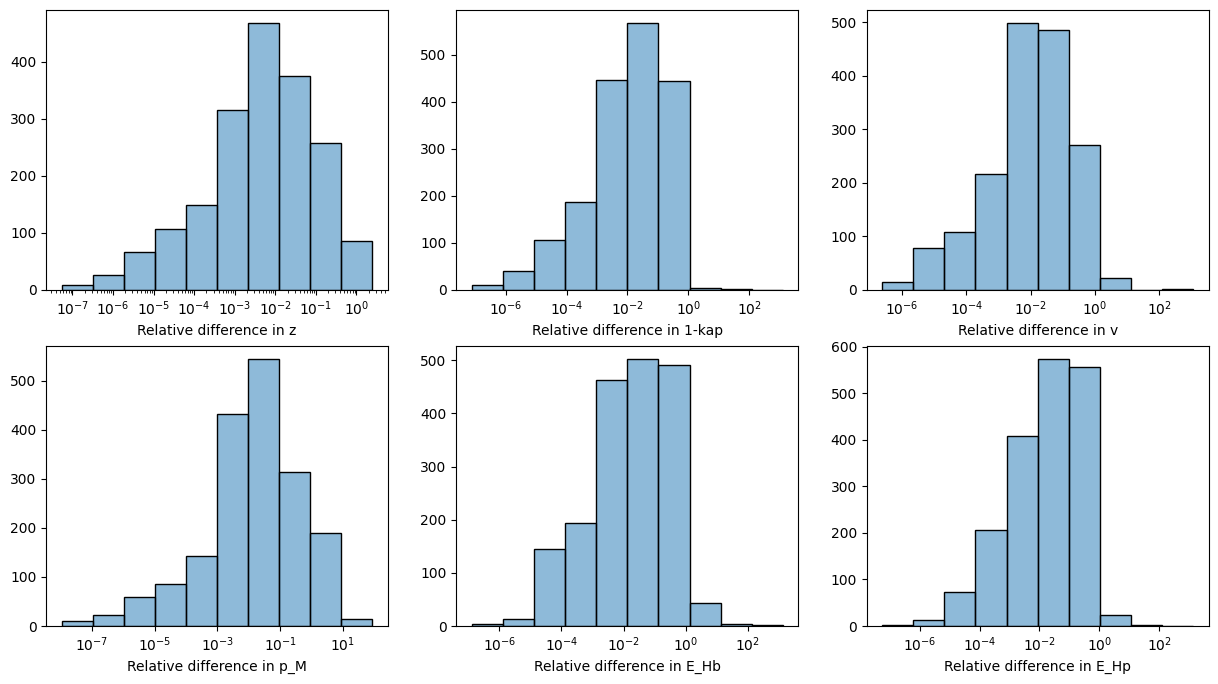

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, par in enumerate(pars_to_compare):
    ax = axes[i // 3, i % 3]
    sns.histplot(gap_df[par+'_gap'], bins=10, kde=True, ax=ax, log_scale=True)
    ax.set_xlabel(f'Relative difference in {par}')
    ax.set_ylabel('')

In [16]:
gap_df.describe()

,loss_diff,loss_gap,z_gap,1-kap_gap,v_gap,p_M_gap,E_Hb_gap,E_Hp_gap,par_dist_metric
count,1866.000000,1866.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,0.503086,9.695719,0.071681,0.786546,0.690327,0.501763,1.316564,0.885818,4.252699
std,5.559454,21.929540,0.181188,29.047798,25.594978,3.021181,34.753978,31.007801,96.308807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000054,0.043600,0.000765,0.001489,0.000771,0.001819,0.002726,0.002782,0.018282
50%,0.001016,0.960334,0.005024,0.014465,0.008426,0.016353,0.021533,0.021158,0.116263
75%,0.008162,6.634350,0.039455,0.097971,0.059526,0.125142,0.172175,0.146707,0.777167
max,128.958901,99.954867,2.480512,1254.968898,1105.965846,88.435453,1350.696588,1339.531796,3945.315232


Text(0, 0.5, 'Parameter distance metric')

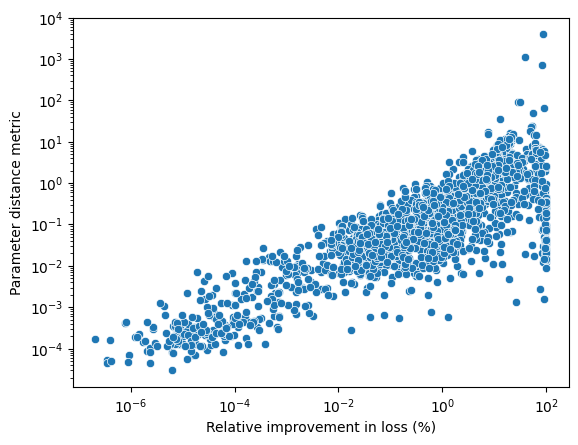

In [17]:
ax = sns.scatterplot(data=gap_df, x='loss_gap', y='par_dist_metric')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Relative improvement in loss (%)')
ax.set_ylabel('Parameter distance metric')

## Specific cases to investigate